In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def relu(x):
    return np.max([x, np.zeros_like(x)], axis=0)

def lrelu(x, alpha):
    return np.max([x, np.zeros_like(x)], axis=0) + alpha * np.min([x, np.zeros_like(x)], axis=0)

x = np.arange(-10,10,0.01)

f'(-28)=0
a = 0.009, b = 0.476, c = 6.669


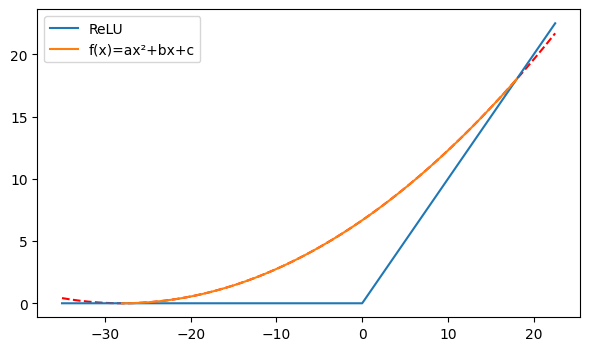

f'(18)=1
a = 0.013, b = 0.524, c = 4.287


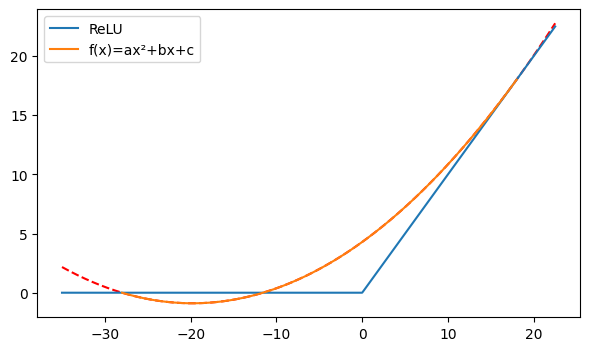

In [3]:
lower = -28
upper = 18
x = np.linspace(lower,upper,1000)
x2 = np.linspace(lower*1.25,upper*1.25,1000)

def f1(x, A, B, print_params=False):
    a = -A/(A-B)**2
    b = (A**2+B**2)/(A-B)**2
    c = -A*B**2/(A-B)**2
    if print_params:
        print(f"f'({upper})=1")
        print(f"a = {a:.3f}, b = {b:.3f}, c = {c:.3f}")
    return a*x**2 + b*x + c

def f2(x, A, B, print_params=False):
    a = B/(B-A)**2
    b = - 2*A*B/(B-A)**2
    c = A**2*B/(B-A)**2
    if print_params:
        print(f"f'({lower})=0")
        print(f"a = {a:.3f}, b = {b:.3f}, c = {c:.3f}")
    return a*x**2 + b*x + c

plt.figure(figsize=(7, 4))
plt.plot(x2,f2(x2,lower,upper),"--",color="red")
plt.plot(x2,relu(x2),label="ReLU")
plt.plot(x,f2(x,lower,upper,print_params=True),label="f(x)=ax²+bx+c")
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(x2,f1(x2,lower,upper),"--",color="red")
plt.plot(x2,relu(x2),label="ReLU")
plt.plot(x,f1(x,lower,upper,print_params=True),label="f(x)=ax²+bx+c")
plt.legend()
plt.show()

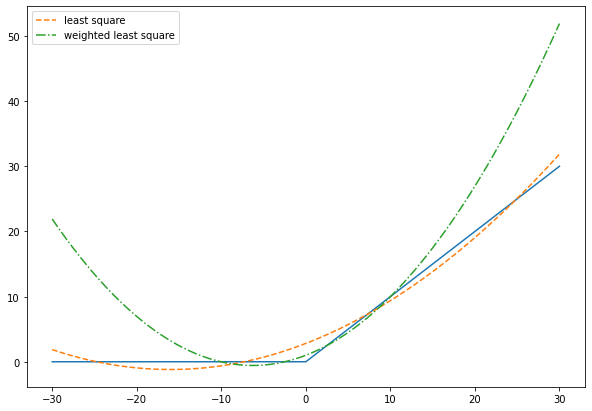

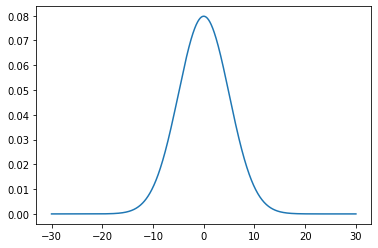

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

lower = -30
upper =  30

def relu(x):
    return np.max([x, np.zeros_like(x)], axis=0)

x_eval = np.linspace(lower, upper, 1000)
def cost(q):
    return np.sum((np.polyval(q, x_eval) - relu(x_eval))**2)
res1 = minimize(cost, np.random.uniform(-1, 1, 3))

x_eval = np.linspace(lower, upper, 1000)
sigma = 5
mu = 0 # upper - (upper - lower) / 2
rho = (2 * np.pi * sigma**2)**-0.5 * np.exp(-(x_eval - mu)**2 / (2 * sigma**2))
def cost(q):
    return np.sum(rho * (np.polyval(q, x_eval) - relu(x_eval))**2)
res2 = minimize(cost, np.random.uniform(-1, 1, 3))

plt.figure(figsize=(10, 7))
plt.plot(x_eval, relu(x_eval))
plt.plot(x_eval, np.polyval(res1.x, x_eval), "--", label="least square")
plt.plot(x_eval, np.polyval(res2.x, x_eval), "-.", label="weighted least square")
plt.legend()
plt.show()

plt.plot(x_eval,rho)

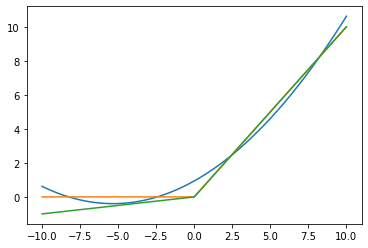

In [12]:
# least squares
x_eval = np.linspace(-10,10,1000)
p = np.array([0.04682817, 0.5       , 0.93843844])
plt.plot(x_eval, np.polyval(p, x_eval))
plt.plot(x_eval, relu(x_eval))
plt.plot(x_eval, lrelu(x_eval, 0.1))
plt.show()

2.1259673343557858e-17
1.880705240311624e-21
1.0122849377675402e-26
 0:  0.42767
 1:  0.50000
 2:  0.11524
 3: 2.2522718307508712e-17
 4: -0.00141
 5: -4.004162816458362e-19
 6: 7.295213826651628e-06
 7: 1.880705240311624e-21


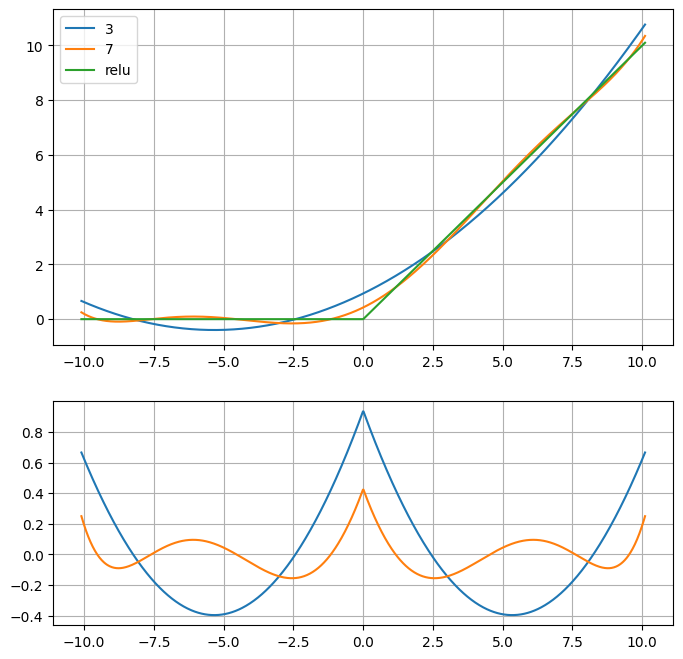

In [6]:
lower = -10
upper =  10

x_eval = np.linspace(lower, upper, 1000)
coeffs3 = np.polyfit(x_eval, relu(x_eval), 3).tolist()
coeffs7 = np.polyfit(x_eval, relu(x_eval), 7).tolist()
coeffs15 = np.polyfit(x_eval, relu(x_eval), 15).tolist()

x_plot = np.linspace(lower*1.01, upper*1.01, 1000)

fig, axes = plt.subplots(2,1, figsize=(8,8), gridspec_kw={'height_ratios': [3, 2]})

ax = axes[0]
ax.plot(x_plot, np.polyval(coeffs3, x_plot), label="3")
ax.plot(x_plot, np.polyval(coeffs7, x_plot), label="7")
#ax.plot(x_plot, np.polyval(coeffs15, x_plot), label="15")
ax.plot(x_plot, relu(x_plot), label="relu")
ax.grid()
ax.legend()

ax = axes[1]
ax.plot(x_plot, np.polyval(coeffs3, x_plot) - relu(x_plot))
ax.plot(x_plot, np.polyval(coeffs7, x_plot) - relu(x_plot))
#ax.plot(x_plot, np.polyval(coeffs15, x_plot) - relu(x_plot))
ax.grid()

for c in [coeffs3, coeffs7, coeffs15]:
    print(c[0])

for i,c in enumerate(coeffs7[::-1]):
    if abs(c) < 1e-5:
        print(f"{i:2d}: {c}")
    else:
        print(f"{i:2d}: {c:8.5f}")

plt.show()

7
5
3


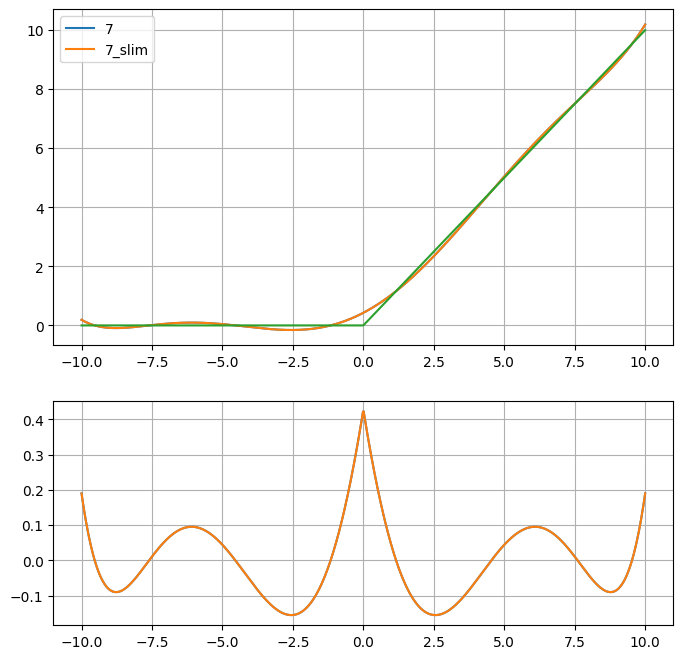

In [30]:
lower = -10
upper =  10

x_eval = np.linspace(lower, upper, 1000)
coeffs7 = np.polyfit(x_eval, relu(x_eval), 7).tolist()
coeffs7_slim = np.copy(coeffs7)

for i,c in enumerate(coeffs7):
    if abs(c) < 1e-15:
        coeffs7_slim[i] = 0
        print(7-i)

x_plot = np.linspace(lower, upper, 1000)

fig, axes = plt.subplots(2,1, figsize=(8,8), gridspec_kw={'height_ratios': [3, 2]})

ax = axes[0]
ax.plot(x_plot, np.polyval(coeffs7, x_plot), label="7")
ax.plot(x_plot, np.polyval(coeffs7_slim, x_plot), label="7_slim")
ax.plot(x_plot, relu(x_plot), label="relu")
ax.grid()
ax.legend()

ax = axes[1]
ax.plot(x_plot, np.polyval(coeffs7, x_plot) - relu(x_plot), label="7")
ax.plot(x_plot, np.polyval(coeffs7_slim, x_plot) - relu(x_plot), label="7_slim")
ax.grid()

plt.show()

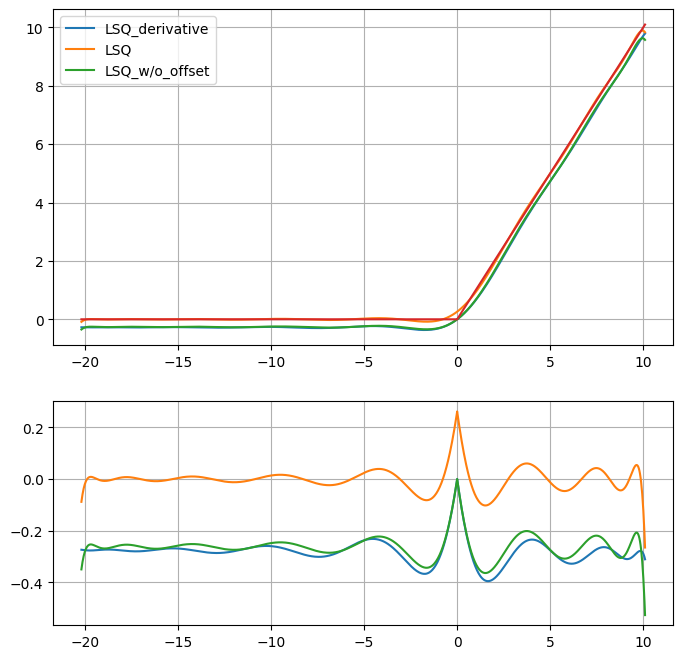

In [4]:
lower = -10
upper =  10

degree = 16

x_eval_large = np.linspace(lower, upper, 1000)
coeffs = np.polyfit(x_eval_large, np.heaviside(x_eval_large, 0), degree - 1)
x_plot = np.linspace(lower*1.01, upper*1.01, 1000)

coeffs /= (np.arange(len(coeffs))[::-1] + 1)
coeffs = coeffs.tolist()
coeffs.append(0)

coeffs2 = np.polyfit(x_eval_large, relu(x_eval_large), degree).tolist()

coeffs3 = np.copy(coeffs2)
coeffs3[-1] = 0

fig, axes = plt.subplots(2,1, figsize=(8,8), gridspec_kw={'height_ratios': [3, 2]})

ax = axes[0]
ax.plot(x_plot, np.polyval(coeffs, x_plot), label="LSQ_derivative")
ax.plot(x_plot, np.polyval(coeffs2, x_plot), label="LSQ")
ax.plot(x_plot, np.polyval(coeffs3, x_plot), label="LSQ_w/o_offset")
ax.plot(x_plot, relu(x_plot))
ax.grid()
ax.legend()
ax = axes[1]
ax.plot(x_plot, np.polyval(coeffs, x_plot) - relu(x_plot))
ax.plot(x_plot, np.polyval(coeffs2, x_plot) - relu(x_plot))
ax.plot(x_plot, np.polyval(coeffs3, x_plot) - relu(x_plot))
ax.grid()
plt.show()

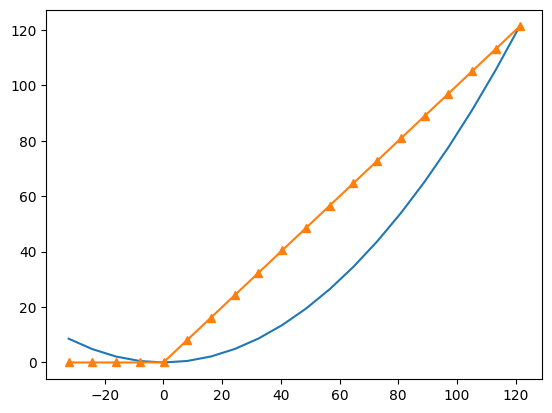

In [41]:
n = 10
lower = -32.26
upper =  121.29
x_eval = np.linspace(lower,upper,20)

coeffs = [1/upper, 0, 0]
plt.plot(x_eval, np.polyval(coeffs, x_eval))
plt.plot(x_eval, relu(x_eval), "^-")
plt.show()

In [43]:
a = [1,2,3,4]
b = [1,2]
for ai in a:
    for bi in b:
        print(ai,bi)
        if ai == 4: break

1 1
1 2
2 1
2 2
3 1
3 2
4 1


In [36]:
s = "EXACT16_sldfhka"
int(s.split("_")[0][5:])

16

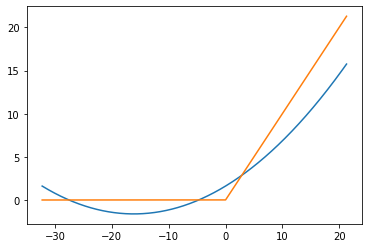

In [34]:
n = 10
lower = -32.26
upper =  21.29
x_eval = np.linspace(lower,upper,1000)

coeffs = [-4/(n*lower), 4/n, -lower/(2*n)]
plt.plot(x_eval, np.polyval(coeffs, x_eval))
plt.plot(x_eval, relu(x_eval))
plt.show()

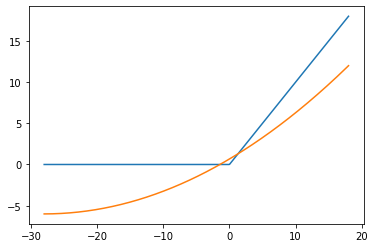

In [7]:
# gls code
lower = -28
upper = 18
x = np.linspace(a, b, 500)
plt.plot(x, relu(x))

q = np.linalg.solve(
    [
        [lower**2, lower, 1],
        [2*lower, 1, 0],
        [upper**2, upper, 1]
    ],
    [0, 0, upper]
)
# q[-1] /= 10
plt.plot(x, np.polyval(q, x))

plt.show()

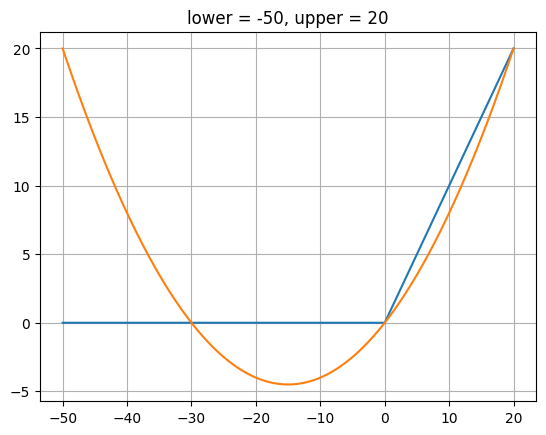

In [18]:
# gls code
lower = -50
upper = 20
x = np.linspace(lower, upper, 500)
plt.plot(x, relu(x))

q = np.linalg.solve(
    [
        [lower**2, lower, 1],
        [upper**2, upper, 1],
        [0, 0, 1]
    ],
    [upper, upper, 0]
)
# q[-1] /= 10
plt.plot(x, np.polyval(q, x))
plt.grid()
plt.title(f"lower = {lower}, upper = {upper}")
plt.show()

lower: -28 upper: 18
  0.0135135135
  0.7567567568
  0.0000000000


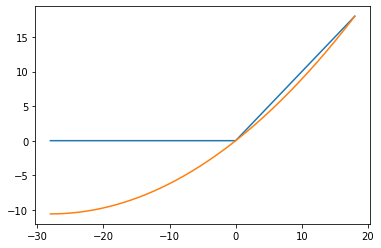

In [7]:
# GLS Martin
lower = -28
upper = 18
x = np.linspace(lower, upper, 500)
plt.plot(x, relu(x))

coeffs = np.linalg.solve(
    [
        [0, 0, 1],
        [2*lower, 1, 0],
        [upper**2, upper, 1]
    ],
    [0, 0, upper]
)
# coeffs[-1] /= 8
print("lower:", lower, "upper:", upper)
for c in coeffs:
    print(f"  {c:.10f}")

plt.plot(x, np.polyval(coeffs, x))

plt.show()

['0.049', '0.506', '0.865']
['0.197', '0.506', '0.216']
0.04935809881501268
0.1974323952600507
0.1974323952600507
0.864873947028254
0.2162184867570635
0.2162184867570635


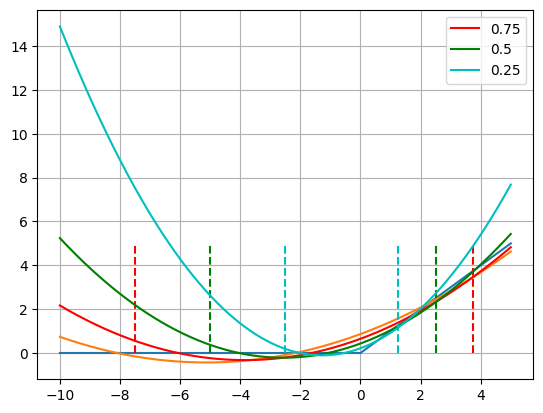

In [95]:
lower = -10
upper =  5

x_eval = np.linspace(lower, upper, 1000)
colors = ["r","g","c"]

# ReLU plot
plt.plot(x_eval, relu(x_eval))

# standard LSQ2_NO_OFFSET
coeffs = np.polyfit(x_eval, relu(x_eval), 2).tolist()
#coeffs[-1] = 0
print([f"{c:.3f}" for c in coeffs])
plt.plot(x_eval, np.polyval(coeffs, x_eval))

factors = [0.75, 0.5, 0.25]
for i,factor in enumerate(factors):
    x_eval_scaled = np.linspace(lower * factor, upper * factor, 1000)
    coeffs_scaled = np.polyfit(x_eval_scaled, relu(x_eval_scaled), 2).tolist()
    #coeffs_scaled[-1] = 0

    plt.plot(x_eval, np.polyval(coeffs_scaled, x_eval), label=factor, color=colors[i])
    plt.plot([lower*factor]*2, [0, upper], "--", color=colors[i])
    plt.plot([upper*factor]*2, [0, upper], "--", color=colors[i])

print([f"{c:.3f}" for c in coeffs_scaled])
print(coeffs[0])
print(coeffs[0] / 0.25)
print(coeffs_scaled[0])

print(coeffs[2])
print(coeffs[2] * 0.25)
print(coeffs_scaled[2])

plt.legend()
plt.grid()
plt.show()

In [89]:
x = np.random.rand(100,1,4,4)

np.split(x,1)[0].shape

(100, 1, 4, 4)

In [34]:
import tenseal as ts

In [ ]:
# SEAL Context
bits_scale = 25
    
# Create TenSEAL context
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=2**14,
    coeff_mod_bit_sizes=[31] + [bits_scale]*n_mults + [31]
)

context.global_scale = pow(2, bits_scale)
context.generate_galois_keys()

In [7]:
from math import log2, floor

def get_mult_depth(degree: int) -> int:
    return floor(log2(degree)) + 1

In [54]:
import numpy as np

mult_depths = {i: get_mult_depth(i) for i in range(2,32)}

d = {i:[] for i in np.unique(list(mult_depths.values()))}
for k,v in mult_depths.items():
    d[v].append(k)

d

{2: [2, 3],
 3: [4, 5, 6, 7],
 4: [8, 9, 10, 11, 12, 13, 14, 15],
 5: [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]}

In [86]:
bits_scale = 25

for mult_depth, degrees in d.items():
    print(f"mult.depth: {mult_depth}", flush=True)

    # create context
    context = ts.context(
        ts.SCHEME_TYPE.CKKS,
        poly_modulus_degree=2**14,
        coeff_mod_bit_sizes=[30] + [bits_scale]*mult_depth + [30]
    )
    context.global_scale = 2**bits_scale
    context.generate_galois_keys()

    x_enc = ts.ckks_vector(context, np.random.rand(1000))

    test_enc = x_enc.copy()
    for i in range(10):
        try:
            test_enc = test_enc * 0.1
        except:
            print(f"  {i+1}. Multiplikation mit Fehler")
            break

    # should work for list degrees
    print(f"  polyval of degrees {degrees}", flush=True)
    print("  ", end="", flush=True)
    for degree in degrees:
        coeffs = np.random.rand(degree+1).tolist()
        y_enc = x_enc.polyval(coeffs)
        print(f"{degree} ", flush=True, end="")

    print("  Done")

    # should not work for all degrees one depth further
    if mult_depth + 1 in d:
        degrees = d[mult_depth+1]
        print(f"  polyval should throw error with degrees {degrees}", flush=True)
        for degree in degrees:
            coeffs = np.random.rand(degree+1).tolist()
            try:
                y_enc = x_enc.polyval(coeffs)
                print(f"    NO error at {degree}", flush=True)
            except:
                print(f"    {degree} error caught", flush=True)
    else:
        degree = max(degrees) + 1
        print(f"  polyval should throw error with degree {degree}")
        coeffs = np.random.rand(degree+1).tolist()
        try:
            y_enc = x_enc.polyval(coeffs)
            print(f"    NO error at {degree}", flush=True)
        except:
            print("    error caught", flush=True)
        

mult.depth: 2
  3. Multiplikation mit Fehler
  polyval of degrees [2, 3]
  2 3   Done
  polyval should throw error with degrees [4, 5, 6, 7]
    4 error caught
    5 error caught
    6 error caught
    7 error caught
mult.depth: 3
  4. Multiplikation mit Fehler
  polyval of degrees [4, 5, 6, 7]
  4 5 6 7   Done
  polyval should throw error with degrees [8, 9, 10, 11, 12, 13, 14, 15]
    8 error caught
    9 error caught
    10 error caught
    11 error caught
    12 error caught
    13 error caught
    14 error caught
    15 error caught
mult.depth: 4
  5. Multiplikation mit Fehler
  polyval of degrees [8, 9, 10, 11, 12, 13, 14, 15]
  8 9 10 11 12 13 14 15   Done
  polyval should throw error with degrees [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
    16 error caught
    17 error caught
    18 error caught
    19 error caught
    20 error caught
    21 error caught
    22 error caught
    23 error caught
    24 error caught
    25 error caught
    26 error caught
 